# 1. Pobranie zbioru danych z Repozytorium

In [1]:
!curl -OL https://git.wmi.amu.edu.pl/s434788/ium_434788/raw/branch/master/winequality-red.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   98k    0   98k    0     0   282k      0 --:--:-- --:--:-- --:--:--  281k


In [2]:
import pandas as pd
wine=pd.read_csv('winequality-red.csv')
wine

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[1599 rows x 12 columns]

# 2. Podział na zbiory test/train przy pomocy SciKit

Próbowałem również podzielić na podzbiory Train:Dev:Test 6:2:2 Przy pomocy basha ale uznałem, że wygodniejsze jest korzystanie z "train_test_split()". Docelowo podział będzie dokonywany na 4 zmienne ` X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)`, jednak chciałem zachować konwencje z przykładu, z ćwiczeń.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [3]:
from sklearn.model_selection import train_test_split

wine_train, wine_test = train_test_split(wine, test_size=360,train_size=959, random_state=1)

In [4]:
wine_test["quality"].value_counts()

5    155
6    149
7     37
4     16
8      2
3      1
Name: quality, dtype: int64

In [5]:
wine_train["quality"].value_counts()

5    400
6    388
7    125
4     30
8     11
3      5
Name: quality, dtype: int64

# 3. Statystyki dla zbior

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

## 3.1. Zbiór Train

In [7]:
wine_train

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
1589            6.6             0.725         0.20  ...       0.54      9.2        5
854             9.3             0.360         0.39  ...       0.73     10.9        6
83              7.3             0.670         0.26  ...       1.14      9.4        5
1106            8.2             0.230         0.42  ...       0.54     12.3        6
650            10.7             0.430         0.39  ...       0.50      9.6        5
...             ...               ...          ...  ...        ...      ...      ...
526             7.3             0.365         0.49  ...       0.78     11.0        5
583            12.0             0.280         0.49  ...       0.66      9.9        7
975             7.2             0.410         0.30  ...       0.52      9.4        5
566             8.7             0.700         0.24  ...       0.60      9.0        6
1232            7.6             0.430         0.29  ...       0.64      9.5        5

[959 rows x 12 columns]

In [8]:
wine_train["quality"].value_counts()

5    400
6    388
7    125
4     30
8     11
3      5
Name: quality, dtype: int64

In [9]:
wine_train.describe(include='all')

fixed acidity  volatile acidity  ...     alcohol     quality
count     959.000000        959.000000  ...  959.000000  959.000000
mean        8.329093          0.526809  ...   10.433160    5.657977
std         1.808394          0.175221  ...    1.084349    0.805654
min         4.600000          0.120000  ...    8.400000    3.000000
25%         7.100000          0.400000  ...    9.500000    5.000000
50%         7.900000          0.520000  ...   10.100000    6.000000
75%         9.300000          0.635000  ...   11.100000    6.000000
max        15.900000          1.330000  ...   14.900000    8.000000

[8 rows x 12 columns]

Testowy Wykres (quality, volatile acidity)

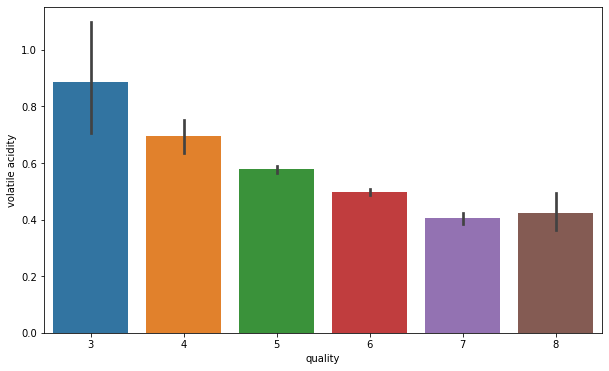

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

## 3.2. Zbiór Test

In [11]:
wine_test

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
75              8.8             0.410         0.64  ...       0.66     10.5        5
1283            8.7             0.630         0.28  ...       0.63     10.2        6
408            10.4             0.340         0.58  ...       0.70     11.3        6
1281            7.1             0.460         0.20  ...       0.64     10.4        6
1118            7.1             0.390         0.12  ...       0.53     13.3        6
...             ...               ...          ...  ...        ...      ...      ...
1461            6.2             0.785         0.00  ...       0.61     10.0        4
1016            8.9             0.380         0.40  ...       0.75     12.6        7
1412            8.2             0.240         0.34  ...       0.94     10.9        6
424             7.7             0.960         0.20  ...       0.44     10.9        5
120             7.3             1.070         0.09  ...       0.57      9.0        5

[360 rows x 12 columns]

In [12]:
wine_test["quality"].value_counts()

5    155
6    149
7     37
4     16
8      2
3      1
Name: quality, dtype: int64

In [13]:
wine_test.describe(include='all')

fixed acidity  volatile acidity  ...     alcohol     quality
count     360.000000        360.000000  ...  360.000000  360.000000
mean        8.348611          0.518764  ...   10.368889    5.586111
std         1.580574          0.182554  ...    1.041729    0.767245
min         5.000000          0.120000  ...    8.700000    3.000000
25%         7.200000          0.380000  ...    9.500000    5.000000
50%         8.000000          0.500000  ...   10.100000    6.000000
75%         9.200000          0.640000  ...   11.000000    6.000000
max        15.600000          1.115000  ...   14.000000    8.000000

[8 rows x 12 columns]

Testowy Wykres (quality, volatile acidity)

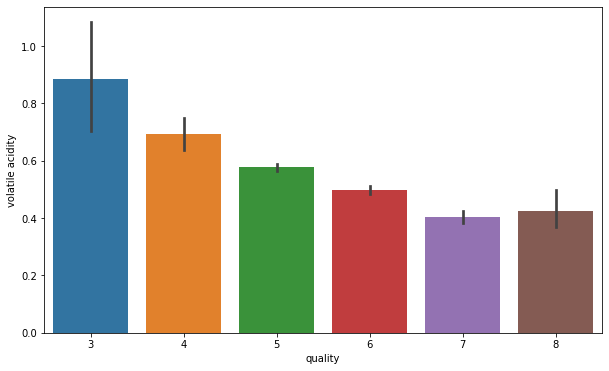

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

## 3.3. Cały zbiór

In [15]:
wine

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[1599 rows x 12 columns]

In [16]:
wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [17]:
wine.describe(include='all')

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

Testowy Wykres (quality, volatile acidity)

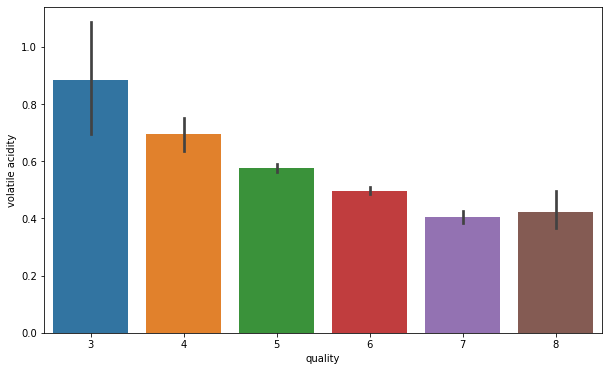

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

# 4. Normalizacja

Normalizacja kolumny 'quality' na wartości od 0 do 20. Nie jest ona konieczna ale została stworzona w celach demonstracyjnych

In [19]:
wine["quality"]=((wine["quality"]-wine["quality"].min())/(wine["quality"].max()-wine["quality"].min()))*20

In [20]:
wine

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4      8.0
1               7.8             0.880         0.00  ...       0.68      9.8      8.0
2               7.8             0.760         0.04  ...       0.65      9.8      8.0
3              11.2             0.280         0.56  ...       0.58      9.8     12.0
4               7.4             0.700         0.00  ...       0.56      9.4      8.0
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5      8.0
1595            5.9             0.550         0.10  ...       0.76     11.2     12.0
1596            6.3             0.510         0.13  ...       0.75     11.0     12.0
1597            5.9             0.645         0.12  ...       0.71     10.2      8.0
1598            6.0             0.310         0.47  ...       0.66     11.0     12.0

[1599 rows x 12 columns]

In [21]:
wine["quality"].value_counts()

8.0     681
12.0    638
16.0    199
4.0      53
20.0     18
0.0      10
Name: quality, dtype: int64

# 5. Usuwanie artefaktów

### Całe szczęscie nie ma w moim zbiorze ani pustych linijek, ani przykładów z niepoprawnymi wartościami

In [22]:
# Znajdźmy pustą linijkę:
! grep -P "^$" -n winequality-red.csv

Szukanie wartości "NA": https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [23]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [24]:
wine.dropna(inplace=True) 

In [25]:
wine

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4      8.0
1               7.8             0.880         0.00  ...       0.68      9.8      8.0
2               7.8             0.760         0.04  ...       0.65      9.8      8.0
3              11.2             0.280         0.56  ...       0.58      9.8     12.0
4               7.4             0.700         0.00  ...       0.56      9.4      8.0
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5      8.0
1595            5.9             0.550         0.10  ...       0.76     11.2     12.0
1596            6.3             0.510         0.13  ...       0.75     11.0     12.0
1597            5.9             0.645         0.12  ...       0.71     10.2      8.0
1598            6.0             0.310         0.47  ...       0.66     11.0     12.0

[1599 rows x 12 columns]